# creating models

In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import pandas as pd
 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [31]:
indf = pd.read_excel('data/clean/indf.xlsx').drop('Unnamed: 0', axis=1)
outdf = pd.read_excel('data/clean/outdf.xlsx').drop('Unnamed: 0', axis=1)

TEST_SPLIT = int(0.80 * len(indf))
X_train, y_train, X_test, y_test = indf.iloc[:TEST_SPLIT], outdf.iloc[:TEST_SPLIT], indf.iloc[TEST_SPLIT:], outdf.iloc[TEST_SPLIT:]
len(X_train), len(X_test), len(indf)

(9228, 2308, 11536)

In [32]:
indf

,Series date,Length Overall,Maximum Beam,Draft,Displacement,DLR,IMS Division,Dynamic Allowance,Age Allowance,Mainsail measured,...,Mizzen measured,Mizzen rated,Headsail Flying measured,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated
0,0.926917,0.129929,0.092691,0.166967,0.012646,0.198474,0.666667,0.200000,1.000000,0.049676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.880755,0.139393,0.102733,0.062528,0.019525,0.406542,0.000000,0.800000,1.000000,0.031359,...,0.056285,0.056638,0.050080,0.148463,0.032390,0.135318,0.0,0.0,0.0,0.0
2,0.940614,0.161120,0.107443,0.207639,0.019245,0.264876,0.666667,0.000000,1.000000,0.069499,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.964422,0.098186,0.070207,0.155250,0.004272,0.078507,1.000000,0.000000,0.800821,0.044433,...,0.000000,0.000000,0.000000,0.000000,0.043438,0.181478,0.0,0.0,0.0,0.0
4,0.964422,0.098186,0.070207,0.155250,0.004272,0.078507,1.000000,0.000000,0.800821,0.044433,...,0.000000,0.000000,0.000000,0.000000,0.043438,0.181478,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,0.993278,0.114077,0.099711,0.163024,0.009759,0.174742,1.000000,0.000000,0.133470,0.042830,...,0.000000,0.000000,0.055708,0.165149,0.044585,0.186268,0.0,0.0,0.0,0.0
11532,0.817285,0.081329,0.061409,0.076386,0.008794,0.436856,0.666667,0.680000,1.000000,0.027189,...,0.000000,0.000000,0.000000,0.000000,0.020251,0.084603,0.0,0.0,0.0,0.0
11533,0.931483,0.134661,0.095001,0.179811,0.010956,0.191282,1.000000,0.000000,1.000000,0.055850,...,0.000000,0.000000,0.000000,0.000000,0.055785,0.233060,0.0,0.0,0.0,0.0
11534,0.926917,0.125631,0.108509,0.183979,0.010565,0.177380,0.666667,0.146667,1.000000,0.051593,...,0.000000,0.000000,0.000000,0.000000,0.054677,0.228430,0.0,0.0,0.0,0.0


In [33]:
outdf

,Beat Angles 6 kt,Beat Angles 8 kt,Beat Angles 10 kt,Beat Angles 12 kt,Beat Angles 14 kt,Beat Angles 16 kt,Beat Angles 20 kt,Beat Angles 24 kt,Beat VMG 6 kt,Beat VMG 8 kt,...,Run VMG 20 kt,Run VMG 24 kt,Gybe Angles 6 kt,Gybe Angles 8 kt,Gybe Angles 10 kt,Gybe Angles 12 kt,Gybe Angles 14 kt,Gybe Angles 16 kt,Gybe Angles 20 kt,Gybe Angles 24 kt
0,42.900002,40.799999,39.099998,37.799999,37.099998,36.599998,36.200001,36.599998,3.74,4.58,...,8.46,9.370000,140.800003,146.899994,150.500000,155.800003,165.100006,176.800003,177.699997,176.399994
1,49.400002,48.000000,47.200001,47.200001,47.500000,48.200001,49.599998,51.700001,2.63,3.24,...,7.71,8.320000,144.800003,148.699997,152.500000,156.800003,165.100006,175.000000,179.000000,179.000000
2,42.500000,40.200001,38.599998,37.799999,37.299999,37.099998,37.500000,38.500000,4.14,4.96,...,8.70,9.510000,141.399994,146.500000,150.699997,155.600006,163.300003,175.399994,178.300003,178.100006
3,42.599998,40.200001,38.799999,38.700001,38.400002,38.200001,38.900002,40.599998,4.08,4.85,...,11.50,14.570000,143.100006,145.800003,149.699997,149.600006,146.500000,145.699997,146.199997,150.300003
4,42.599998,40.200001,38.799999,38.700001,38.400002,38.200001,38.900002,40.599998,4.08,4.85,...,11.50,14.570000,143.100006,145.800003,149.699997,149.600006,146.500000,145.699997,146.199997,150.300003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,44.099998,41.700001,40.000000,38.900002,38.400002,38.299999,39.200001,40.400002,3.53,4.33,...,8.27,10.320000,143.300003,146.899994,148.000000,149.399994,148.399994,146.600006,143.100006,139.500000
11532,43.799999,42.000000,41.299999,40.599998,39.900002,39.599998,39.799999,40.900002,2.96,3.56,...,6.98,7.520000,145.300003,151.000000,153.800003,159.399994,173.600006,178.100006,179.000000,179.000000
11533,42.400002,40.000000,38.200001,37.400002,37.099998,37.299999,37.400002,38.900002,3.99,4.80,...,8.90,11.450000,143.000000,146.199997,149.300003,151.300003,149.399994,146.699997,143.600006,144.199997
11534,42.799999,40.599998,38.799999,37.599998,37.599998,37.500000,37.500000,38.700001,3.77,4.61,...,8.91,11.580000,143.100006,146.500000,148.899994,150.600006,148.600006,146.500000,143.300003,143.500000


In [34]:
import os 
if not os.path.exists('models'):
    os.mkdir('models')
    
tesatTensor = torch.tensor(indf.iloc[0].values, dtype=torch.float32)
tesatTensor

tensor([0.9269, 0.1299, 0.0927, 0.1670, 0.0126, 0.1985, 0.6667, 0.2000, 1.0000,
        0.0497, 0.0446, 0.0445, 0.0651, 0.2816, 0.2816, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

#### custom dataset and dataloader

In [35]:
from torch.utils.data import Dataset, DataLoader
col0 = outdf.columns.tolist()[0]

# making dataset
class MyDataset(Dataset):
    def __init__(self, input_df, output_df):
        self.input_df = input_df 
        self.output_df = output_df 
    
    def __len__(self):
        return len(self.input_df)
    
    def __getitem__(self, idx):
        input_data = self.input_df.iloc[idx].values 
        output_data = self.output_df.iloc[idx] 
        
        input_tensor = torch.tensor(input_data, dtype=torch.float32)
        output_tensor = torch.tensor(output_data, dtype=torch.float32)
        return input_tensor, output_tensor
    
train_dataset = MyDataset(X_train, y_train[col0])
test_dataset = MyDataset(X_test, y_test[col0]) 

# making dataloader
train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=32,
                              shuffle=True, 
                              num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_dataset, 
                             batch_size=32, 
                             shuffle=False, 
                             num_workers=os.cpu_count())

# test 
print(len(train_dataloader), len(test_dataloader))
x, y = next(iter(train_dataloader))
print(x.shape, y.shape)

289 73
torch.Size([32, 25]) torch.Size([32])


In [36]:
from tqdm.auto import tqdm
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device=device):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss = 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred = model(X).squeeze()

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    return test_loss

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device=device):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss = 0 
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X).squeeze()

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    return train_loss

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module, 
          optimizer: torch.optim.Optimizer, 
          epochs: int, 
          device: torch.device = device):
    results = {"train_loss": [], 
               "test_loss": []}
    
    for epoch in tqdm(range(epochs)):
        train_loss = train_step(model=model, 
                                dataloader=train_dataloader, 
                                loss_fn=loss_fn, 
                                optimizer=optimizer,
                                device=device)
        test_loss = test_step(model=model, 
                              dataloader=test_dataloader, 
                              loss_fn=loss_fn,
                              device=device)
        
        print(f"epoch: {epoch}, train_loss: {train_loss:.4f}, test_loss: {test_loss:.4f}")
        results['train_loss'].append(train_loss)
        results['test_loss'].append(test_loss)
    
    return results
    

In [37]:
def plot_results(res):
    test_loss = res['test_loss']
    train_loss = res['train_loss'] 
    epochs = range(len(train_loss))
    
    plt.figure(figsize=(10, 7)) 
    plt.plot(epochs, train_loss, label="train_loss") 
    plt.plot(epochs, test_loss, label="test_loss") 
    plt.title("loss")
    plt.legend()
    plt.show()

def plot_results_since(res, since):
    test_loss = res['test_loss'][since:]
    train_loss = res['train_loss'][since:]
    epochs = range(len(train_loss))
    
    plt.figure(figsize=(10, 7)) 
    plt.plot(epochs, train_loss, label="train_loss") 
    plt.plot(epochs, test_loss, label="test_loss") 
    plt.title("loss")
    plt.legend()
    plt.show()
    
    
    

#### model 0

In [38]:
from torch import nn
class yachtModel0(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS = 32
OUT_FEATURES = 1
EPOCHS = 50

torch.manual_seed(42) 
model0 = yachtModel0(input_shape=IN_FEATURES, 
                     hidden_units=HIDDEN_UNITS, 
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model0.parameters(),
                             lr=0.0002)

  2%|▏         | 1/50 [00:02<01:40,  2.05s/it]

epoch: 0, train_loss: 1862.4671, test_loss: 1751.9011


  4%|▍         | 2/50 [00:03<01:34,  1.97s/it]

epoch: 1, train_loss: 1364.0157, test_loss: 781.6338


  6%|▌         | 3/50 [00:05<01:33,  1.99s/it]

epoch: 2, train_loss: 307.5306, test_loss: 50.7169


  8%|▊         | 4/50 [00:07<01:30,  1.97s/it]

epoch: 3, train_loss: 23.9390, test_loss: 22.3305


 10%|█         | 5/50 [00:10<01:31,  2.04s/it]

epoch: 4, train_loss: 18.1340, test_loss: 21.0307


 12%|█▏        | 6/50 [00:12<01:29,  2.03s/it]

epoch: 5, train_loss: 16.9596, test_loss: 19.7153


 14%|█▍        | 7/50 [00:14<01:27,  2.03s/it]

epoch: 6, train_loss: 15.7107, test_loss: 18.1134


 16%|█▌        | 8/50 [00:16<01:24,  2.02s/it]

epoch: 7, train_loss: 14.0385, test_loss: 16.2120


 18%|█▊        | 9/50 [00:18<01:21,  1.99s/it]

epoch: 8, train_loss: 12.3192, test_loss: 14.3078


 20%|██        | 10/50 [00:19<01:18,  1.97s/it]

epoch: 9, train_loss: 10.7466, test_loss: 12.6174


 22%|██▏       | 11/50 [00:21<01:16,  1.97s/it]

epoch: 10, train_loss: 9.3828, test_loss: 11.2572


 24%|██▍       | 12/50 [00:23<01:14,  1.97s/it]

epoch: 11, train_loss: 8.2622, test_loss: 9.9437


 26%|██▌       | 13/50 [00:25<01:13,  1.99s/it]

epoch: 12, train_loss: 7.3397, test_loss: 8.7787


 28%|██▊       | 14/50 [00:27<01:11,  1.98s/it]

epoch: 13, train_loss: 6.5395, test_loss: 7.8032


 30%|███       | 15/50 [00:30<01:11,  2.04s/it]

epoch: 14, train_loss: 5.8446, test_loss: 6.9291


 32%|███▏      | 16/50 [00:31<01:08,  2.01s/it]

epoch: 15, train_loss: 5.2266, test_loss: 6.0569


 34%|███▍      | 17/50 [00:34<01:06,  2.02s/it]

epoch: 16, train_loss: 4.6711, test_loss: 5.3072


 36%|███▌      | 18/50 [00:36<01:04,  2.00s/it]

epoch: 17, train_loss: 4.1572, test_loss: 4.7449


 38%|███▊      | 19/50 [00:38<01:02,  2.02s/it]

epoch: 18, train_loss: 3.7314, test_loss: 4.0505


 40%|████      | 20/50 [00:40<01:00,  2.03s/it]

epoch: 19, train_loss: 3.2557, test_loss: 3.5286


 42%|████▏     | 21/50 [00:42<00:58,  2.02s/it]

epoch: 20, train_loss: 2.8728, test_loss: 2.9821


 44%|████▍     | 22/50 [00:44<00:55,  1.98s/it]

epoch: 21, train_loss: 2.5309, test_loss: 2.5285


 46%|████▌     | 23/50 [00:45<00:53,  1.97s/it]

epoch: 22, train_loss: 2.2407, test_loss: 2.1294


 48%|████▊     | 24/50 [00:48<00:51,  2.00s/it]

epoch: 23, train_loss: 2.0038, test_loss: 1.8642


 50%|█████     | 25/50 [00:49<00:49,  1.98s/it]

epoch: 24, train_loss: 1.8145, test_loss: 1.6608


 52%|█████▏    | 26/50 [00:52<00:49,  2.05s/it]

epoch: 25, train_loss: 1.6779, test_loss: 1.5121


 54%|█████▍    | 27/50 [00:54<00:45,  2.00s/it]

epoch: 26, train_loss: 1.5704, test_loss: 1.4024


 56%|█████▌    | 28/50 [00:55<00:43,  1.97s/it]

epoch: 27, train_loss: 1.4921, test_loss: 1.3303


 58%|█████▊    | 29/50 [00:57<00:41,  1.96s/it]

epoch: 28, train_loss: 1.4299, test_loss: 1.3199


 60%|██████    | 30/50 [00:59<00:39,  1.99s/it]

epoch: 29, train_loss: 1.3790, test_loss: 1.2232


 62%|██████▏   | 31/50 [01:01<00:37,  1.98s/it]

epoch: 30, train_loss: 1.3378, test_loss: 1.1865


 64%|██████▍   | 32/50 [01:03<00:35,  1.99s/it]

epoch: 31, train_loss: 1.3018, test_loss: 1.1428


 66%|██████▌   | 33/50 [01:06<00:35,  2.10s/it]

epoch: 32, train_loss: 1.2605, test_loss: 1.1533


 68%|██████▊   | 34/50 [01:08<00:31,  1.99s/it]

epoch: 33, train_loss: 1.2291, test_loss: 1.0796


 70%|███████   | 35/50 [01:09<00:28,  1.93s/it]

epoch: 34, train_loss: 1.1960, test_loss: 1.0453


 72%|███████▏  | 36/50 [01:11<00:26,  1.86s/it]

epoch: 35, train_loss: 1.1631, test_loss: 1.0250


 74%|███████▍  | 37/50 [01:13<00:24,  1.87s/it]

epoch: 36, train_loss: 1.1376, test_loss: 0.9854


 76%|███████▌  | 38/50 [01:15<00:22,  1.86s/it]

epoch: 37, train_loss: 1.1037, test_loss: 0.9790


 78%|███████▊  | 39/50 [01:17<00:20,  1.89s/it]

epoch: 38, train_loss: 1.0781, test_loss: 0.9642


 80%|████████  | 40/50 [01:19<00:18,  1.89s/it]

epoch: 39, train_loss: 1.0567, test_loss: 0.9039


 82%|████████▏ | 41/50 [01:21<00:17,  1.92s/it]

epoch: 40, train_loss: 1.0242, test_loss: 0.8842


 84%|████████▍ | 42/50 [01:22<00:15,  1.89s/it]

epoch: 41, train_loss: 1.0037, test_loss: 0.8644


 86%|████████▌ | 43/50 [01:24<00:13,  1.90s/it]

epoch: 42, train_loss: 0.9774, test_loss: 0.8458


 88%|████████▊ | 44/50 [01:26<00:11,  1.94s/it]

epoch: 43, train_loss: 0.9623, test_loss: 0.8560


 90%|█████████ | 45/50 [01:28<00:09,  1.98s/it]

epoch: 44, train_loss: 0.9394, test_loss: 0.8567


 92%|█████████▏| 46/50 [01:30<00:07,  1.98s/it]

epoch: 45, train_loss: 0.9203, test_loss: 0.8278


 94%|█████████▍| 47/50 [01:32<00:05,  1.95s/it]

epoch: 46, train_loss: 0.9011, test_loss: 0.7998


 96%|█████████▌| 48/50 [01:34<00:03,  1.95s/it]

epoch: 47, train_loss: 0.8864, test_loss: 0.7470


 98%|█████████▊| 49/50 [01:36<00:01,  1.92s/it]

epoch: 48, train_loss: 0.8658, test_loss: 0.7314


100%|██████████| 50/50 [01:38<00:00,  1.97s/it]

epoch: 49, train_loss: 0.8494, test_loss: 0.7164


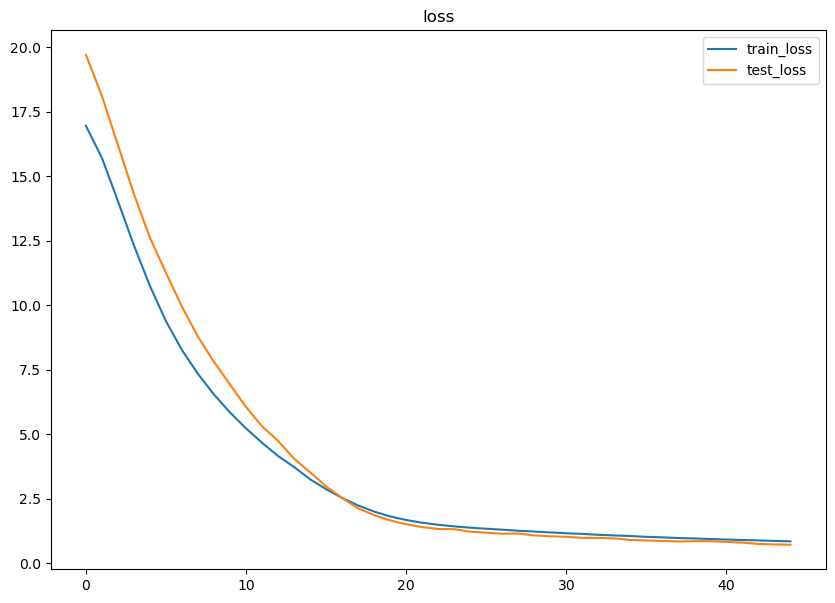

In [39]:
model0_results = train(model=model0, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model0_results, 5)

#### model 1

In [40]:
class yachtModel1(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 64
HIDDEN_UNITS2 = 32
OUT_FEATURES = 1

torch.manual_seed(42) 
model1 = yachtModel1(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model1.parameters(),
                             lr=0.0002)

  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:01<01:33,  1.91s/it]

epoch: 0, train_loss: 1654.8724, test_loss: 850.8917


  4%|▍         | 2/50 [00:03<01:32,  1.94s/it]

epoch: 1, train_loss: 139.1843, test_loss: 18.7102


  6%|▌         | 3/50 [00:05<01:32,  1.96s/it]

epoch: 2, train_loss: 14.8365, test_loss: 16.2664


  8%|▊         | 4/50 [00:07<01:28,  1.93s/it]

epoch: 3, train_loss: 12.2129, test_loss: 13.2806


 10%|█         | 5/50 [00:09<01:29,  1.99s/it]

epoch: 4, train_loss: 9.7072, test_loss: 10.7305


 12%|█▏        | 6/50 [00:11<01:25,  1.95s/it]

epoch: 5, train_loss: 7.6719, test_loss: 8.7175


 14%|█▍        | 7/50 [00:13<01:24,  1.96s/it]

epoch: 6, train_loss: 6.2915, test_loss: 7.3590


 16%|█▌        | 8/50 [00:15<01:22,  1.96s/it]

epoch: 7, train_loss: 5.2639, test_loss: 5.8918


 18%|█▊        | 9/50 [00:17<01:18,  1.91s/it]

epoch: 8, train_loss: 4.4296, test_loss: 4.9486


 20%|██        | 10/50 [00:19<01:16,  1.92s/it]

epoch: 9, train_loss: 3.6950, test_loss: 3.9684


 22%|██▏       | 11/50 [00:21<01:14,  1.90s/it]

epoch: 10, train_loss: 3.0849, test_loss: 3.1597


 24%|██▍       | 12/50 [00:23<01:13,  1.94s/it]

epoch: 11, train_loss: 2.5576, test_loss: 2.5467


 26%|██▌       | 13/50 [00:25<01:11,  1.94s/it]

epoch: 12, train_loss: 2.1371, test_loss: 2.0594


 28%|██▊       | 14/50 [00:27<01:11,  1.98s/it]

epoch: 13, train_loss: 1.8156, test_loss: 1.6889


 30%|███       | 15/50 [00:29<01:09,  1.99s/it]

epoch: 14, train_loss: 1.5807, test_loss: 1.4639


 32%|███▏      | 16/50 [00:31<01:07,  1.97s/it]

epoch: 15, train_loss: 1.4281, test_loss: 1.3318


 34%|███▍      | 17/50 [00:33<01:04,  1.95s/it]

epoch: 16, train_loss: 1.3129, test_loss: 1.2302


 36%|███▌      | 18/50 [00:35<01:01,  1.94s/it]

epoch: 17, train_loss: 1.2350, test_loss: 1.1407


 38%|███▊      | 19/50 [00:37<01:02,  2.00s/it]

epoch: 18, train_loss: 1.1703, test_loss: 1.0907


 40%|████      | 20/50 [00:39<00:59,  1.98s/it]

epoch: 19, train_loss: 1.1162, test_loss: 1.0273


 42%|████▏     | 21/50 [00:41<00:58,  2.03s/it]

epoch: 20, train_loss: 1.0591, test_loss: 0.9942


 44%|████▍     | 22/50 [00:43<00:58,  2.09s/it]

epoch: 21, train_loss: 1.0016, test_loss: 0.9079


 46%|████▌     | 23/50 [00:45<00:55,  2.05s/it]

epoch: 22, train_loss: 0.9508, test_loss: 0.8562


 48%|████▊     | 24/50 [00:47<00:54,  2.12s/it]

epoch: 23, train_loss: 0.9162, test_loss: 0.8114


 50%|█████     | 25/50 [00:49<00:53,  2.13s/it]

epoch: 24, train_loss: 0.8873, test_loss: 0.8185


 52%|█████▏    | 26/50 [00:52<00:51,  2.15s/it]

epoch: 25, train_loss: 0.8270, test_loss: 0.8378


 54%|█████▍    | 27/50 [00:54<00:48,  2.11s/it]

epoch: 26, train_loss: 0.7825, test_loss: 0.7129


 56%|█████▌    | 28/50 [00:56<00:46,  2.09s/it]

epoch: 27, train_loss: 0.7496, test_loss: 0.6721


 58%|█████▊    | 29/50 [00:58<00:43,  2.07s/it]

epoch: 28, train_loss: 0.7199, test_loss: 0.6141


 60%|██████    | 30/50 [01:00<00:41,  2.07s/it]

epoch: 29, train_loss: 0.6932, test_loss: 0.6102


 62%|██████▏   | 31/50 [01:01<00:37,  1.97s/it]

epoch: 30, train_loss: 0.6635, test_loss: 0.5615


 64%|██████▍   | 32/50 [01:04<00:36,  2.00s/it]

epoch: 31, train_loss: 0.6534, test_loss: 0.5561


 66%|██████▌   | 33/50 [01:06<00:35,  2.07s/it]

epoch: 32, train_loss: 0.6298, test_loss: 0.5189


 68%|██████▊   | 34/50 [01:08<00:32,  2.03s/it]

epoch: 33, train_loss: 0.6125, test_loss: 0.5007


 70%|███████   | 35/50 [01:10<00:31,  2.11s/it]

epoch: 34, train_loss: 0.5915, test_loss: 0.5008


 72%|███████▏  | 36/50 [01:12<00:29,  2.08s/it]

epoch: 35, train_loss: 0.5808, test_loss: 0.4801


 74%|███████▍  | 37/50 [01:14<00:27,  2.11s/it]

epoch: 36, train_loss: 0.5764, test_loss: 0.4706


 76%|███████▌  | 38/50 [01:16<00:25,  2.09s/it]

epoch: 37, train_loss: 0.5584, test_loss: 0.4611


 78%|███████▊  | 39/50 [01:18<00:23,  2.12s/it]

epoch: 38, train_loss: 0.5521, test_loss: 0.4915


 80%|████████  | 40/50 [01:20<00:20,  2.10s/it]

epoch: 39, train_loss: 0.5483, test_loss: 0.4736


 82%|████████▏ | 41/50 [01:22<00:18,  2.07s/it]

epoch: 40, train_loss: 0.5428, test_loss: 0.4509


 84%|████████▍ | 42/50 [01:24<00:16,  2.03s/it]

epoch: 41, train_loss: 0.5321, test_loss: 0.4430


 86%|████████▌ | 43/50 [01:26<00:14,  2.05s/it]

epoch: 42, train_loss: 0.5302, test_loss: 0.4312


 88%|████████▊ | 44/50 [01:29<00:12,  2.08s/it]

epoch: 43, train_loss: 0.5228, test_loss: 0.4248


 90%|█████████ | 45/50 [01:31<00:10,  2.05s/it]

epoch: 44, train_loss: 0.5277, test_loss: 0.4281


 92%|█████████▏| 46/50 [01:33<00:08,  2.03s/it]

epoch: 45, train_loss: 0.5193, test_loss: 0.4290


 94%|█████████▍| 47/50 [01:35<00:06,  2.03s/it]

epoch: 46, train_loss: 0.5111, test_loss: 0.4247


 96%|█████████▌| 48/50 [01:37<00:04,  2.06s/it]

epoch: 47, train_loss: 0.5151, test_loss: 0.4177


 98%|█████████▊| 49/50 [01:39<00:02,  2.03s/it]

epoch: 48, train_loss: 0.5074, test_loss: 0.4237


100%|██████████| 50/50 [01:41<00:00,  2.03s/it]

epoch: 49, train_loss: 0.5080, test_loss: 0.4150


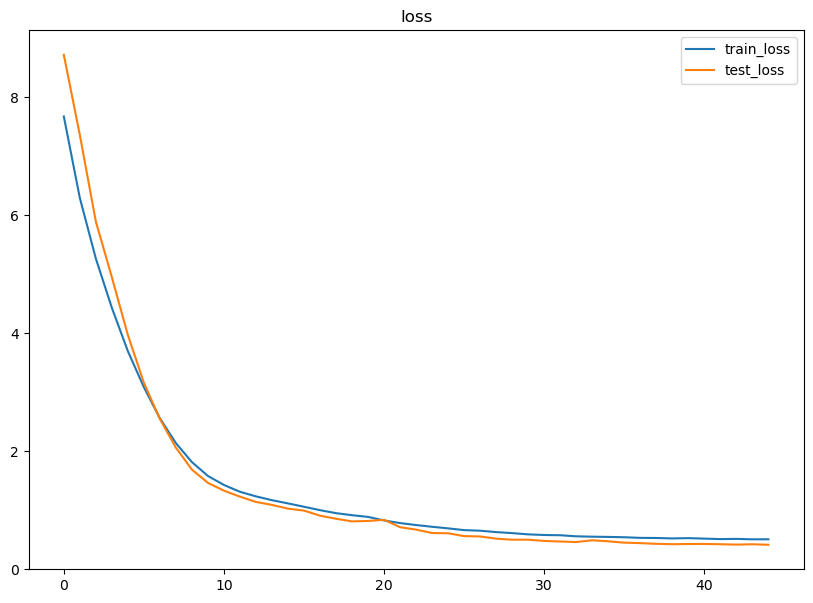

In [41]:
model1_results = train(model=model1, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model1_results, 5)

### model 2

In [42]:
class yachtModel2(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 64
HIDDEN_UNITS2 = 32
OUT_FEATURES = 1

torch.manual_seed(42) 
model2 = yachtModel2(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model2.parameters(),
                             lr=0.00015)

  2%|▏         | 1/50 [00:02<01:39,  2.03s/it]

epoch: 0, train_loss: 1543.6060, test_loss: 580.0082


  4%|▍         | 2/50 [00:04<01:39,  2.08s/it]

epoch: 1, train_loss: 78.9134, test_loss: 17.3881


  6%|▌         | 3/50 [00:06<01:33,  2.00s/it]

epoch: 2, train_loss: 13.0214, test_loss: 15.3451


  8%|▊         | 4/50 [00:08<01:32,  2.00s/it]

epoch: 3, train_loss: 11.3307, test_loss: 13.4663


 10%|█         | 5/50 [00:10<01:31,  2.02s/it]

epoch: 4, train_loss: 9.7897, test_loss: 11.7730


 12%|█▏        | 6/50 [00:12<01:30,  2.05s/it]

epoch: 5, train_loss: 8.3824, test_loss: 10.1630


 14%|█▍        | 7/50 [00:14<01:27,  2.04s/it]

epoch: 6, train_loss: 7.2163, test_loss: 8.9069


 16%|█▌        | 8/50 [00:16<01:25,  2.03s/it]

epoch: 7, train_loss: 6.2120, test_loss: 7.5728


 18%|█▊        | 9/50 [00:18<01:24,  2.07s/it]

epoch: 8, train_loss: 5.3664, test_loss: 6.6651


 20%|██        | 10/50 [00:20<01:20,  2.01s/it]

epoch: 9, train_loss: 4.6292, test_loss: 5.6618


 22%|██▏       | 11/50 [00:22<01:20,  2.06s/it]

epoch: 10, train_loss: 4.0250, test_loss: 4.7592


 24%|██▍       | 12/50 [00:24<01:17,  2.04s/it]

epoch: 11, train_loss: 3.4779, test_loss: 4.0056


 26%|██▌       | 13/50 [00:26<01:14,  2.02s/it]

epoch: 12, train_loss: 3.0098, test_loss: 3.3431


 28%|██▊       | 14/50 [00:28<01:11,  1.99s/it]

epoch: 13, train_loss: 2.5943, test_loss: 2.7109


 30%|███       | 15/50 [00:30<01:12,  2.07s/it]

epoch: 14, train_loss: 2.2422, test_loss: 2.2168


 32%|███▏      | 16/50 [00:32<01:09,  2.05s/it]

epoch: 15, train_loss: 1.9651, test_loss: 1.8262


 34%|███▍      | 17/50 [00:34<01:06,  2.02s/it]

epoch: 16, train_loss: 1.7380, test_loss: 1.5576


 36%|███▌      | 18/50 [00:36<01:03,  2.00s/it]

epoch: 17, train_loss: 1.5813, test_loss: 1.3909


 38%|███▊      | 19/50 [00:38<01:01,  1.98s/it]

epoch: 18, train_loss: 1.4688, test_loss: 1.2639


 40%|████      | 20/50 [00:40<00:59,  2.00s/it]

epoch: 19, train_loss: 1.3965, test_loss: 1.1935


 42%|████▏     | 21/50 [00:42<00:58,  2.00s/it]

epoch: 20, train_loss: 1.3361, test_loss: 1.1617


 44%|████▍     | 22/50 [00:44<00:54,  1.94s/it]

epoch: 21, train_loss: 1.2814, test_loss: 1.0893


 46%|████▌     | 23/50 [00:46<00:52,  1.95s/it]

epoch: 22, train_loss: 1.2350, test_loss: 1.0469


 48%|████▊     | 24/50 [00:48<00:51,  1.97s/it]

epoch: 23, train_loss: 1.2062, test_loss: 1.0217


 50%|█████     | 25/50 [00:50<00:49,  1.98s/it]

epoch: 24, train_loss: 1.2124, test_loss: 1.0427


 52%|█████▏    | 26/50 [00:52<00:47,  1.98s/it]

epoch: 25, train_loss: 1.1302, test_loss: 1.0907


 54%|█████▍    | 27/50 [00:54<00:45,  1.99s/it]

epoch: 26, train_loss: 1.0826, test_loss: 0.9556


 56%|█████▌    | 28/50 [00:56<00:43,  1.99s/it]

epoch: 27, train_loss: 1.0494, test_loss: 0.8896


 58%|█████▊    | 29/50 [00:58<00:42,  2.01s/it]

epoch: 28, train_loss: 1.0206, test_loss: 0.8337


 60%|██████    | 30/50 [01:00<00:39,  1.97s/it]

epoch: 29, train_loss: 0.9829, test_loss: 0.8727


 62%|██████▏   | 31/50 [01:02<00:37,  1.97s/it]

epoch: 30, train_loss: 0.9468, test_loss: 0.7744


 64%|██████▍   | 32/50 [01:04<00:35,  1.98s/it]

epoch: 31, train_loss: 0.9246, test_loss: 0.7998


 66%|██████▌   | 33/50 [01:06<00:33,  1.97s/it]

epoch: 32, train_loss: 0.8988, test_loss: 0.7250


 68%|██████▊   | 34/50 [01:08<00:31,  1.95s/it]

epoch: 33, train_loss: 0.8692, test_loss: 0.7020


 70%|███████   | 35/50 [01:09<00:28,  1.91s/it]

epoch: 34, train_loss: 0.8405, test_loss: 0.6714


 72%|███████▏  | 36/50 [01:11<00:27,  1.95s/it]

epoch: 35, train_loss: 0.8187, test_loss: 0.6620


 74%|███████▍  | 37/50 [01:13<00:25,  1.95s/it]

epoch: 36, train_loss: 0.7995, test_loss: 0.6441


 76%|███████▌  | 38/50 [01:15<00:23,  1.95s/it]

epoch: 37, train_loss: 0.7690, test_loss: 0.6170


 78%|███████▊  | 39/50 [01:17<00:21,  1.94s/it]

epoch: 38, train_loss: 0.7548, test_loss: 0.6315


 80%|████████  | 40/50 [01:19<00:19,  1.93s/it]

epoch: 39, train_loss: 0.7409, test_loss: 0.5840


 82%|████████▏ | 41/50 [01:21<00:17,  1.91s/it]

epoch: 40, train_loss: 0.7223, test_loss: 0.5746


 84%|████████▍ | 42/50 [01:23<00:15,  1.94s/it]

epoch: 41, train_loss: 0.6980, test_loss: 0.5678


 86%|████████▌ | 43/50 [01:25<00:13,  1.88s/it]

epoch: 42, train_loss: 0.6915, test_loss: 0.5453


 88%|████████▊ | 44/50 [01:27<00:11,  1.88s/it]

epoch: 43, train_loss: 0.6721, test_loss: 0.5290


 90%|█████████ | 45/50 [01:28<00:09,  1.84s/it]

epoch: 44, train_loss: 0.6684, test_loss: 0.5299


 92%|█████████▏| 46/50 [01:30<00:07,  1.88s/it]

epoch: 45, train_loss: 0.6490, test_loss: 0.5194


 94%|█████████▍| 47/50 [01:32<00:05,  1.90s/it]

epoch: 46, train_loss: 0.6345, test_loss: 0.4994


 96%|█████████▌| 48/50 [01:34<00:03,  1.90s/it]

epoch: 47, train_loss: 0.6291, test_loss: 0.4879


 98%|█████████▊| 49/50 [01:36<00:01,  1.93s/it]

epoch: 48, train_loss: 0.6127, test_loss: 0.4903


100%|██████████| 50/50 [01:38<00:00,  1.97s/it]

epoch: 49, train_loss: 0.6063, test_loss: 0.4812


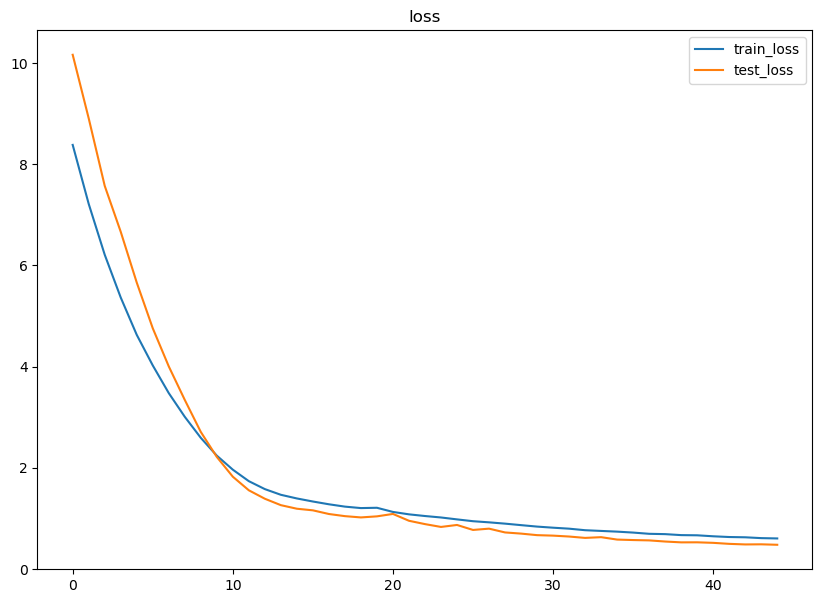

In [43]:
model2_results = train(model=model2, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model2_results, 5)

## model 3

In [44]:
class yachtModel3(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 32
HIDDEN_UNITS2 = 32
OUT_FEATURES = 1

torch.manual_seed(42) 
model3 = yachtModel3(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model3.parameters(),
                             lr=0.00015)

  2%|▏         | 1/50 [00:01<01:37,  2.00s/it]

epoch: 0, train_loss: 1680.8475, test_loss: 1008.0948


  4%|▍         | 2/50 [00:03<01:32,  1.93s/it]

epoch: 1, train_loss: 209.0508, test_loss: 20.5520


  6%|▌         | 3/50 [00:05<01:28,  1.88s/it]

epoch: 2, train_loss: 15.1199, test_loss: 18.6497


  8%|▊         | 4/50 [00:07<01:25,  1.86s/it]

epoch: 3, train_loss: 13.5455, test_loss: 17.0023


 10%|█         | 5/50 [00:09<01:24,  1.88s/it]

epoch: 4, train_loss: 12.0867, test_loss: 14.9829


 12%|█▏        | 6/50 [00:11<01:24,  1.93s/it]

epoch: 5, train_loss: 10.7457, test_loss: 13.5056


 14%|█▍        | 7/50 [00:13<01:21,  1.91s/it]

epoch: 6, train_loss: 9.5221, test_loss: 11.9841


 16%|█▌        | 8/50 [00:15<01:19,  1.90s/it]

epoch: 7, train_loss: 8.4486, test_loss: 10.8699


 18%|█▊        | 9/50 [00:17<01:19,  1.93s/it]

epoch: 8, train_loss: 7.5147, test_loss: 9.5544


 20%|██        | 10/50 [00:19<01:15,  1.90s/it]

epoch: 9, train_loss: 6.7008, test_loss: 8.4346


 22%|██▏       | 11/50 [00:20<01:13,  1.87s/it]

epoch: 10, train_loss: 5.9856, test_loss: 7.6070


 24%|██▍       | 12/50 [00:22<01:13,  1.92s/it]

epoch: 11, train_loss: 5.3218, test_loss: 6.5668


 26%|██▌       | 13/50 [00:24<01:10,  1.90s/it]

epoch: 12, train_loss: 4.7100, test_loss: 5.5999


 28%|██▊       | 14/50 [00:26<01:09,  1.92s/it]

epoch: 13, train_loss: 4.1613, test_loss: 4.9013


 30%|███       | 15/50 [00:28<01:06,  1.90s/it]

epoch: 14, train_loss: 3.6516, test_loss: 4.1292


 32%|███▏      | 16/50 [00:30<01:04,  1.90s/it]

epoch: 15, train_loss: 3.1715, test_loss: 3.4809


 34%|███▍      | 17/50 [00:32<01:03,  1.92s/it]

epoch: 16, train_loss: 2.7407, test_loss: 2.7885


 36%|███▌      | 18/50 [00:34<01:01,  1.93s/it]

epoch: 17, train_loss: 2.3802, test_loss: 2.4096


 38%|███▊      | 19/50 [00:36<00:58,  1.89s/it]

epoch: 18, train_loss: 2.0671, test_loss: 1.9277


 40%|████      | 20/50 [00:38<00:57,  1.90s/it]

epoch: 19, train_loss: 1.8254, test_loss: 1.6424


 42%|████▏     | 21/50 [00:40<00:55,  1.92s/it]

epoch: 20, train_loss: 1.6455, test_loss: 1.4957


 44%|████▍     | 22/50 [00:41<00:53,  1.91s/it]

epoch: 21, train_loss: 1.5187, test_loss: 1.3202


 46%|████▌     | 23/50 [00:43<00:51,  1.90s/it]

epoch: 22, train_loss: 1.4210, test_loss: 1.2339


 48%|████▊     | 24/50 [00:45<00:49,  1.89s/it]

epoch: 23, train_loss: 1.3503, test_loss: 1.1784


 50%|█████     | 25/50 [00:47<00:48,  1.94s/it]

epoch: 24, train_loss: 1.2998, test_loss: 1.1093


 52%|█████▏    | 26/50 [00:49<00:47,  1.96s/it]

epoch: 25, train_loss: 1.2455, test_loss: 1.0663


 54%|█████▍    | 27/50 [00:51<00:46,  2.01s/it]

epoch: 26, train_loss: 1.2085, test_loss: 1.0258


 56%|█████▌    | 28/50 [00:53<00:43,  1.96s/it]

epoch: 27, train_loss: 1.1654, test_loss: 0.9916


 58%|█████▊    | 29/50 [00:55<00:39,  1.90s/it]

epoch: 28, train_loss: 1.1226, test_loss: 0.9689


 60%|██████    | 30/50 [00:57<00:38,  1.93s/it]

epoch: 29, train_loss: 1.0933, test_loss: 0.9143


 62%|██████▏   | 31/50 [00:59<00:36,  1.93s/it]

epoch: 30, train_loss: 1.0578, test_loss: 0.9608


 64%|██████▍   | 32/50 [01:01<00:34,  1.94s/it]

epoch: 31, train_loss: 1.0258, test_loss: 0.8872


 66%|██████▌   | 33/50 [01:03<00:33,  1.96s/it]

epoch: 32, train_loss: 0.9854, test_loss: 0.8161


 68%|██████▊   | 34/50 [01:05<00:31,  1.97s/it]

epoch: 33, train_loss: 0.9630, test_loss: 0.8031


 70%|███████   | 35/50 [01:07<00:29,  1.95s/it]

epoch: 34, train_loss: 0.9291, test_loss: 0.7679


 72%|███████▏  | 36/50 [01:09<00:26,  1.90s/it]

epoch: 35, train_loss: 0.8980, test_loss: 0.7369


 74%|███████▍  | 37/50 [01:10<00:24,  1.91s/it]

epoch: 36, train_loss: 0.8788, test_loss: 0.7127


 76%|███████▌  | 38/50 [01:12<00:22,  1.90s/it]

epoch: 37, train_loss: 0.8485, test_loss: 0.7188


 78%|███████▊  | 39/50 [01:14<00:20,  1.88s/it]

epoch: 38, train_loss: 0.8266, test_loss: 0.6751


 80%|████████  | 40/50 [01:16<00:19,  1.93s/it]

epoch: 39, train_loss: 0.8005, test_loss: 0.6579


 82%|████████▏ | 41/50 [01:18<00:16,  1.88s/it]

epoch: 40, train_loss: 0.7868, test_loss: 0.6808


 84%|████████▍ | 42/50 [01:20<00:15,  1.89s/it]

epoch: 41, train_loss: 0.7654, test_loss: 0.6264


 86%|████████▌ | 43/50 [01:22<00:13,  1.94s/it]

epoch: 42, train_loss: 0.7468, test_loss: 0.6022


 88%|████████▊ | 44/50 [01:24<00:11,  1.96s/it]

epoch: 43, train_loss: 0.7294, test_loss: 0.5876


 90%|█████████ | 45/50 [01:26<00:09,  1.95s/it]

epoch: 44, train_loss: 0.7146, test_loss: 0.5748


 92%|█████████▏| 46/50 [01:28<00:07,  1.97s/it]

epoch: 45, train_loss: 0.7026, test_loss: 0.5563


 94%|█████████▍| 47/50 [01:30<00:06,  2.02s/it]

epoch: 46, train_loss: 0.6838, test_loss: 0.5638


 96%|█████████▌| 48/50 [01:32<00:03,  1.97s/it]

epoch: 47, train_loss: 0.6729, test_loss: 0.5337


 98%|█████████▊| 49/50 [01:34<00:01,  1.94s/it]

epoch: 48, train_loss: 0.6673, test_loss: 0.5289


100%|██████████| 50/50 [01:36<00:00,  1.93s/it]

epoch: 49, train_loss: 0.6512, test_loss: 0.5270


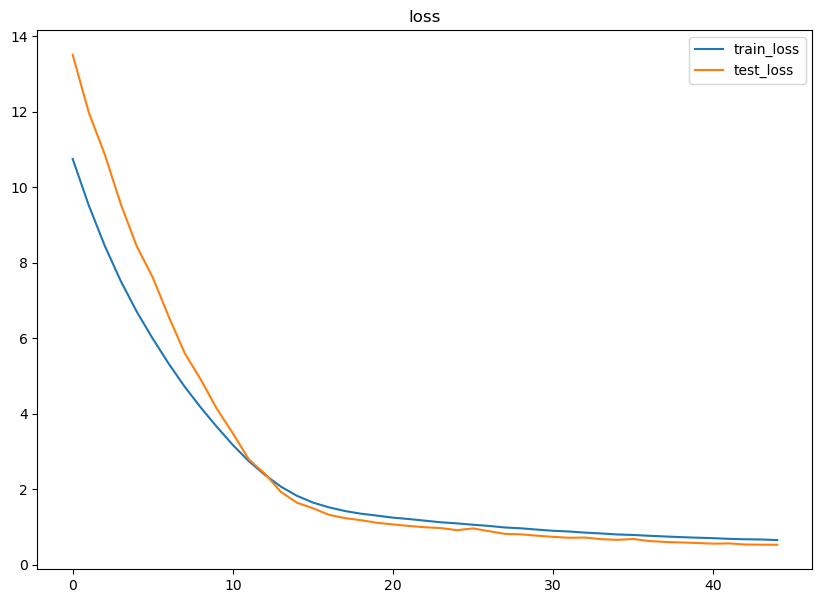

In [45]:
model3_results = train(model=model3, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model3_results, 5)

### model 4

In [46]:
class yachtModel4(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 128
HIDDEN_UNITS2 = 64
OUT_FEATURES = 1

torch.manual_seed(42) 
model4 = yachtModel4(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model4.parameters(),
                             lr=0.00015)

  2%|▏         | 1/50 [00:01<01:32,  1.88s/it]

epoch: 0, train_loss: 918.2735, test_loss: 17.6907


  4%|▍         | 2/50 [00:03<01:29,  1.87s/it]

epoch: 1, train_loss: 13.3952, test_loss: 15.0018


  6%|▌         | 3/50 [00:05<01:29,  1.91s/it]

epoch: 2, train_loss: 11.1325, test_loss: 12.7229


  8%|▊         | 4/50 [00:07<01:30,  1.98s/it]

epoch: 3, train_loss: 9.2066, test_loss: 10.8256


 10%|█         | 5/50 [00:09<01:27,  1.94s/it]

epoch: 4, train_loss: 7.7062, test_loss: 9.2291


 12%|█▏        | 6/50 [00:11<01:24,  1.92s/it]

epoch: 5, train_loss: 6.4544, test_loss: 7.6815


 14%|█▍        | 7/50 [00:13<01:20,  1.87s/it]

epoch: 6, train_loss: 5.3406, test_loss: 5.9970


 16%|█▌        | 8/50 [00:15<01:20,  1.91s/it]

epoch: 7, train_loss: 4.3718, test_loss: 4.8076


 18%|█▊        | 9/50 [00:17<01:19,  1.93s/it]

epoch: 8, train_loss: 3.5173, test_loss: 3.8499


 20%|██        | 10/50 [00:19<01:19,  1.98s/it]

epoch: 9, train_loss: 2.7694, test_loss: 2.6877


 22%|██▏       | 11/50 [00:21<01:18,  2.00s/it]

epoch: 10, train_loss: 2.1810, test_loss: 2.0402


 24%|██▍       | 12/50 [00:23<01:15,  2.00s/it]

epoch: 11, train_loss: 1.7479, test_loss: 1.5503


 26%|██▌       | 13/50 [00:25<01:14,  2.02s/it]

epoch: 12, train_loss: 1.4718, test_loss: 1.2396


 28%|██▊       | 14/50 [00:27<01:13,  2.03s/it]

epoch: 13, train_loss: 1.3055, test_loss: 1.0689


 30%|███       | 15/50 [00:29<01:11,  2.04s/it]

epoch: 14, train_loss: 1.2099, test_loss: 0.9978


 32%|███▏      | 16/50 [00:31<01:09,  2.05s/it]

epoch: 15, train_loss: 1.1488, test_loss: 0.9478


 34%|███▍      | 17/50 [00:33<01:07,  2.03s/it]

epoch: 16, train_loss: 1.0942, test_loss: 0.8978


 36%|███▌      | 18/50 [00:35<01:04,  2.02s/it]

epoch: 17, train_loss: 1.0544, test_loss: 0.8677


 38%|███▊      | 19/50 [00:37<01:03,  2.05s/it]

epoch: 18, train_loss: 1.0124, test_loss: 0.8151


 40%|████      | 20/50 [00:39<01:00,  2.03s/it]

epoch: 19, train_loss: 0.9691, test_loss: 0.7567


 42%|████▏     | 21/50 [00:41<00:58,  2.02s/it]

epoch: 20, train_loss: 0.9119, test_loss: 0.7112


 44%|████▍     | 22/50 [00:43<00:56,  2.02s/it]

epoch: 21, train_loss: 0.8727, test_loss: 0.6726


 46%|████▌     | 23/50 [00:45<00:53,  1.97s/it]

epoch: 22, train_loss: 0.8346, test_loss: 0.6349


 48%|████▊     | 24/50 [00:47<00:52,  2.00s/it]

epoch: 23, train_loss: 0.8031, test_loss: 0.6023


 50%|█████     | 25/50 [00:49<00:49,  2.00s/it]

epoch: 24, train_loss: 0.7803, test_loss: 0.5755


 52%|█████▏    | 26/50 [00:52<00:51,  2.13s/it]

epoch: 25, train_loss: 0.7305, test_loss: 0.5566


 54%|█████▍    | 27/50 [00:53<00:46,  2.01s/it]

epoch: 26, train_loss: 0.7106, test_loss: 0.5508


 56%|█████▌    | 28/50 [00:55<00:42,  1.95s/it]

epoch: 27, train_loss: 0.6852, test_loss: 0.5279


 58%|█████▊    | 29/50 [00:57<00:39,  1.88s/it]

epoch: 28, train_loss: 0.6611, test_loss: 0.5235


 60%|██████    | 30/50 [00:59<00:37,  1.85s/it]

epoch: 29, train_loss: 0.6513, test_loss: 0.4801


 62%|██████▏   | 31/50 [01:00<00:34,  1.83s/it]

epoch: 30, train_loss: 0.6332, test_loss: 0.4621


 64%|██████▍   | 32/50 [01:02<00:32,  1.83s/it]

epoch: 31, train_loss: 0.6107, test_loss: 0.5826


 66%|██████▌   | 33/50 [01:04<00:31,  1.85s/it]

epoch: 32, train_loss: 0.6056, test_loss: 0.4395


 68%|██████▊   | 34/50 [01:06<00:29,  1.84s/it]

epoch: 33, train_loss: 0.5951, test_loss: 0.4352


 70%|███████   | 35/50 [01:08<00:28,  1.87s/it]

epoch: 34, train_loss: 0.5929, test_loss: 0.4935


 72%|███████▏  | 36/50 [01:10<00:26,  1.89s/it]

epoch: 35, train_loss: 0.5733, test_loss: 0.4206


 74%|███████▍  | 37/50 [01:12<00:24,  1.91s/it]

epoch: 36, train_loss: 0.5612, test_loss: 0.5761


 76%|███████▌  | 38/50 [01:14<00:22,  1.89s/it]

epoch: 37, train_loss: 0.5657, test_loss: 0.4149


 78%|███████▊  | 39/50 [01:16<00:20,  1.90s/it]

epoch: 38, train_loss: 0.5620, test_loss: 0.4136


 80%|████████  | 40/50 [01:17<00:18,  1.88s/it]

epoch: 39, train_loss: 0.5413, test_loss: 0.4114


 82%|████████▏ | 41/50 [01:19<00:16,  1.88s/it]

epoch: 40, train_loss: 0.5507, test_loss: 0.4093


 84%|████████▍ | 42/50 [01:21<00:15,  1.93s/it]

epoch: 41, train_loss: 0.5493, test_loss: 0.4210


 86%|████████▌ | 43/50 [01:23<00:13,  1.92s/it]

epoch: 42, train_loss: 0.5458, test_loss: 0.4142


 88%|████████▊ | 44/50 [01:25<00:11,  1.93s/it]

epoch: 43, train_loss: 0.5454, test_loss: 0.4089


 90%|█████████ | 45/50 [01:27<00:09,  1.88s/it]

epoch: 44, train_loss: 0.5406, test_loss: 0.4075


 92%|█████████▏| 46/50 [01:29<00:07,  1.88s/it]

epoch: 45, train_loss: 0.5388, test_loss: 0.4039


 94%|█████████▍| 47/50 [01:31<00:05,  1.85s/it]

epoch: 46, train_loss: 0.5377, test_loss: 0.4066


 96%|█████████▌| 48/50 [01:32<00:03,  1.83s/it]

epoch: 47, train_loss: 0.5328, test_loss: 0.5283


 98%|█████████▊| 49/50 [01:34<00:01,  1.83s/it]

epoch: 48, train_loss: 0.5287, test_loss: 0.4211


100%|██████████| 50/50 [01:36<00:00,  1.93s/it]

epoch: 49, train_loss: 0.5352, test_loss: 0.4341


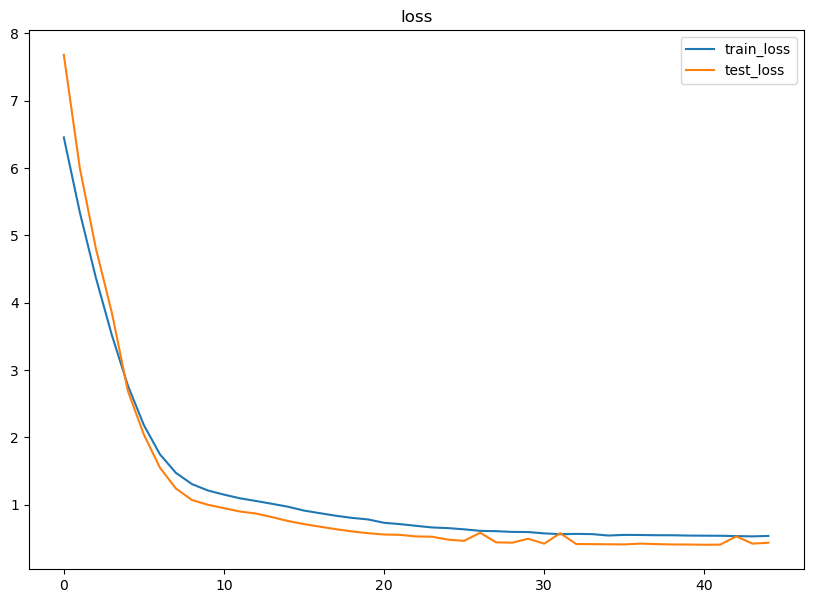

In [47]:
model4_results = train(model=model4, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model4_results, 5)

### trying different loss functions

In [48]:
class yachtModel5(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 128
HIDDEN_UNITS2 = 64
OUT_FEATURES = 1

torch.manual_seed(42) 
model5 = yachtModel5(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.L1Loss()
optimizer = torch.optim.Adam(params=model5.parameters(),
                             lr=0.00015)

  2%|▏         | 1/50 [00:01<01:30,  1.85s/it]

epoch: 0, train_loss: 24.2000, test_loss: 2.9303


  4%|▍         | 2/50 [00:03<01:29,  1.87s/it]

epoch: 1, train_loss: 2.2762, test_loss: 2.4289


  6%|▌         | 3/50 [00:05<01:30,  1.93s/it]

epoch: 2, train_loss: 1.8981, test_loss: 2.0838


  8%|▊         | 4/50 [00:07<01:29,  1.95s/it]

epoch: 3, train_loss: 1.5972, test_loss: 1.6949


 10%|█         | 5/50 [00:09<01:26,  1.93s/it]

epoch: 4, train_loss: 1.3322, test_loss: 1.3333


 12%|█▏        | 6/50 [00:11<01:23,  1.89s/it]

epoch: 5, train_loss: 1.0698, test_loss: 0.9969


 14%|█▍        | 7/50 [00:13<01:21,  1.89s/it]

epoch: 6, train_loss: 0.8338, test_loss: 0.7410


 16%|█▌        | 8/50 [00:15<01:18,  1.87s/it]

epoch: 7, train_loss: 0.7072, test_loss: 0.6967


 18%|█▊        | 9/50 [00:17<01:19,  1.94s/it]

epoch: 8, train_loss: 0.6667, test_loss: 0.6853


 20%|██        | 10/50 [00:19<01:16,  1.90s/it]

epoch: 9, train_loss: 0.6456, test_loss: 0.6061


 22%|██▏       | 11/50 [00:21<01:16,  1.95s/it]

epoch: 10, train_loss: 0.6286, test_loss: 0.5771


 24%|██▍       | 12/50 [00:23<01:14,  1.95s/it]

epoch: 11, train_loss: 0.6198, test_loss: 0.5662


 26%|██▌       | 13/50 [00:25<01:12,  1.96s/it]

epoch: 12, train_loss: 0.6069, test_loss: 0.6434


 28%|██▊       | 14/50 [00:26<01:10,  1.95s/it]

epoch: 13, train_loss: 0.5955, test_loss: 0.6189


 30%|███       | 15/50 [00:28<01:08,  1.96s/it]

epoch: 14, train_loss: 0.5877, test_loss: 0.5325


 32%|███▏      | 16/50 [00:31<01:13,  2.16s/it]

epoch: 15, train_loss: 0.5857, test_loss: 0.5736


 34%|███▍      | 17/50 [00:33<01:09,  2.10s/it]

epoch: 16, train_loss: 0.5776, test_loss: 0.5261


 36%|███▌      | 18/50 [00:35<01:05,  2.04s/it]

epoch: 17, train_loss: 0.5683, test_loss: 0.5228


 38%|███▊      | 19/50 [00:37<01:02,  2.01s/it]

epoch: 18, train_loss: 0.5622, test_loss: 0.5852


 40%|████      | 20/50 [00:39<00:57,  1.93s/it]

epoch: 19, train_loss: 0.5587, test_loss: 0.5443


 42%|████▏     | 21/50 [00:40<00:54,  1.88s/it]

epoch: 20, train_loss: 0.5573, test_loss: 0.6354


 44%|████▍     | 22/50 [00:42<00:53,  1.90s/it]

epoch: 21, train_loss: 0.5568, test_loss: 0.5062


 46%|████▌     | 23/50 [00:44<00:50,  1.88s/it]

epoch: 22, train_loss: 0.5446, test_loss: 0.5028


 48%|████▊     | 24/50 [00:46<00:49,  1.91s/it]

epoch: 23, train_loss: 0.5434, test_loss: 0.4964


 50%|█████     | 25/50 [00:48<00:47,  1.92s/it]

epoch: 24, train_loss: 0.5370, test_loss: 0.4935


 52%|█████▏    | 26/50 [00:50<00:46,  1.93s/it]

epoch: 25, train_loss: 0.5376, test_loss: 0.5026


 54%|█████▍    | 27/50 [00:52<00:44,  1.92s/it]

epoch: 26, train_loss: 0.5348, test_loss: 0.4911


 56%|█████▌    | 28/50 [00:54<00:43,  1.97s/it]

epoch: 27, train_loss: 0.5379, test_loss: 0.4936


 58%|█████▊    | 29/50 [00:56<00:41,  1.99s/it]

epoch: 28, train_loss: 0.5387, test_loss: 0.5047


 60%|██████    | 30/50 [00:58<00:40,  2.00s/it]

epoch: 29, train_loss: 0.5354, test_loss: 0.4877


 62%|██████▏   | 31/50 [01:00<00:38,  2.02s/it]

epoch: 30, train_loss: 0.5296, test_loss: 0.4871


 64%|██████▍   | 32/50 [01:02<00:36,  2.03s/it]

epoch: 31, train_loss: 0.5237, test_loss: 0.5816


 66%|██████▌   | 33/50 [01:05<00:37,  2.19s/it]

epoch: 32, train_loss: 0.5297, test_loss: 0.4809


 68%|██████▊   | 34/50 [01:07<00:33,  2.12s/it]

epoch: 33, train_loss: 0.5315, test_loss: 0.5098


 70%|███████   | 35/50 [01:08<00:30,  2.02s/it]

epoch: 34, train_loss: 0.5348, test_loss: 0.4787


 72%|███████▏  | 36/50 [01:10<00:27,  1.94s/it]

epoch: 35, train_loss: 0.5218, test_loss: 0.4851


 74%|███████▍  | 37/50 [01:12<00:24,  1.92s/it]

epoch: 36, train_loss: 0.5267, test_loss: 0.4783


 76%|███████▌  | 38/50 [01:14<00:23,  1.95s/it]

epoch: 37, train_loss: 0.5167, test_loss: 0.4789


 78%|███████▊  | 39/50 [01:16<00:21,  1.96s/it]

epoch: 38, train_loss: 0.5239, test_loss: 0.4918


 80%|████████  | 40/50 [01:19<00:21,  2.20s/it]

epoch: 39, train_loss: 0.5119, test_loss: 0.4753


 82%|████████▏ | 41/50 [01:21<00:18,  2.07s/it]

epoch: 40, train_loss: 0.5148, test_loss: 0.4751


 84%|████████▍ | 42/50 [01:22<00:15,  1.96s/it]

epoch: 41, train_loss: 0.5150, test_loss: 0.4822


 86%|████████▌ | 43/50 [01:24<00:13,  1.96s/it]

epoch: 42, train_loss: 0.5115, test_loss: 0.4991


 88%|████████▊ | 44/50 [01:26<00:11,  1.91s/it]

epoch: 43, train_loss: 0.5140, test_loss: 0.4792


 90%|█████████ | 45/50 [01:29<00:10,  2.13s/it]

epoch: 44, train_loss: 0.5105, test_loss: 0.4826


 92%|█████████▏| 46/50 [01:31<00:08,  2.06s/it]

epoch: 45, train_loss: 0.5115, test_loss: 0.4983


 94%|█████████▍| 47/50 [01:33<00:06,  2.06s/it]

epoch: 46, train_loss: 0.5123, test_loss: 0.4784


 96%|█████████▌| 48/50 [01:34<00:03,  1.96s/it]

epoch: 47, train_loss: 0.5079, test_loss: 0.4766


 98%|█████████▊| 49/50 [01:36<00:01,  1.95s/it]

epoch: 48, train_loss: 0.5082, test_loss: 0.5157


100%|██████████| 50/50 [01:38<00:00,  1.98s/it]

epoch: 49, train_loss: 0.5076, test_loss: 0.5033


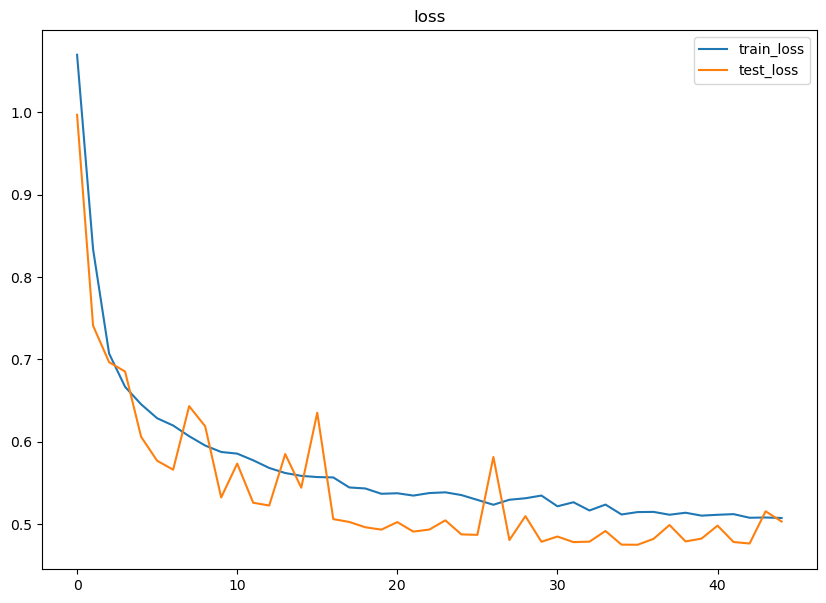

In [49]:
model5_results = train(model=model5, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model5_results, 5)

In [50]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device=device):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss = 0 
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X).view(-1)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    return train_loss

In [51]:
class yachtModel6(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 128
HIDDEN_UNITS2 = 64
OUT_FEATURES = 1

torch.manual_seed(42) 
model6 = yachtModel6(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.HuberLoss()
optimizer = torch.optim.Adam(params=model6.parameters(),
                             lr=0.00015)

  2%|▏         | 1/50 [00:02<01:38,  2.00s/it]

epoch: 0, train_loss: 23.7201, test_loss: 2.4765


  4%|▍         | 2/50 [00:04<01:36,  2.01s/it]

epoch: 1, train_loss: 1.8469, test_loss: 1.9788


  6%|▌         | 3/50 [00:06<01:35,  2.03s/it]

epoch: 2, train_loss: 1.4714, test_loss: 1.6444


  8%|▊         | 4/50 [00:07<01:30,  1.98s/it]

epoch: 3, train_loss: 1.1640, test_loss: 1.2238


 10%|█         | 5/50 [00:09<01:28,  1.98s/it]

epoch: 4, train_loss: 0.8804, test_loss: 0.8364


 12%|█▏        | 6/50 [00:11<01:24,  1.91s/it]

epoch: 5, train_loss: 0.6129, test_loss: 0.5072


 14%|█▍        | 7/50 [00:13<01:21,  1.89s/it]

epoch: 6, train_loss: 0.4152, test_loss: 0.3402


 16%|█▌        | 8/50 [00:15<01:19,  1.89s/it]

epoch: 7, train_loss: 0.3444, test_loss: 0.3474


 18%|█▊        | 9/50 [00:17<01:17,  1.88s/it]

epoch: 8, train_loss: 0.3263, test_loss: 0.3004


 20%|██        | 10/50 [00:19<01:16,  1.91s/it]

epoch: 9, train_loss: 0.3119, test_loss: 0.2792


 22%|██▏       | 11/50 [00:21<01:14,  1.92s/it]

epoch: 10, train_loss: 0.2995, test_loss: 0.2593


 24%|██▍       | 12/50 [00:23<01:13,  1.93s/it]

epoch: 11, train_loss: 0.2885, test_loss: 0.2493


 26%|██▌       | 13/50 [00:25<01:14,  2.02s/it]

epoch: 12, train_loss: 0.2813, test_loss: 0.2779


 28%|██▊       | 14/50 [00:27<01:12,  2.01s/it]

epoch: 13, train_loss: 0.2705, test_loss: 0.2459


 30%|███       | 15/50 [00:29<01:10,  2.01s/it]

epoch: 14, train_loss: 0.2652, test_loss: 0.2383


 32%|███▏      | 16/50 [00:31<01:09,  2.03s/it]

epoch: 15, train_loss: 0.2613, test_loss: 0.2355


 34%|███▍      | 17/50 [00:33<01:07,  2.04s/it]

epoch: 16, train_loss: 0.2595, test_loss: 0.2242


 36%|███▌      | 18/50 [00:35<01:04,  2.00s/it]

epoch: 17, train_loss: 0.2516, test_loss: 0.2282


 38%|███▊      | 19/50 [00:37<01:01,  1.99s/it]

epoch: 18, train_loss: 0.2463, test_loss: 0.2745


 40%|████      | 20/50 [00:39<00:59,  1.99s/it]

epoch: 19, train_loss: 0.2424, test_loss: 0.2126


 42%|████▏     | 21/50 [00:41<00:57,  1.99s/it]

epoch: 20, train_loss: 0.2386, test_loss: 0.2367


 44%|████▍     | 22/50 [00:43<00:56,  2.02s/it]

epoch: 21, train_loss: 0.2381, test_loss: 0.2150


 46%|████▌     | 23/50 [00:45<00:54,  2.02s/it]

epoch: 22, train_loss: 0.2351, test_loss: 0.2033


 48%|████▊     | 24/50 [00:47<00:52,  2.02s/it]

epoch: 23, train_loss: 0.2313, test_loss: 0.2000


 50%|█████     | 25/50 [00:49<00:50,  2.00s/it]

epoch: 24, train_loss: 0.2306, test_loss: 0.1997


 52%|█████▏    | 26/50 [00:51<00:47,  2.00s/it]

epoch: 25, train_loss: 0.2274, test_loss: 0.2221


 54%|█████▍    | 27/50 [00:53<00:46,  2.04s/it]

epoch: 26, train_loss: 0.2267, test_loss: 0.1974


 56%|█████▌    | 28/50 [00:55<00:44,  2.00s/it]

epoch: 27, train_loss: 0.2247, test_loss: 0.2136


 58%|█████▊    | 29/50 [00:57<00:42,  2.01s/it]

epoch: 28, train_loss: 0.2255, test_loss: 0.1973


 60%|██████    | 30/50 [00:59<00:40,  2.01s/it]

epoch: 29, train_loss: 0.2297, test_loss: 0.2151


 62%|██████▏   | 31/50 [01:01<00:38,  2.01s/it]

epoch: 30, train_loss: 0.2247, test_loss: 0.1939


 64%|██████▍   | 32/50 [01:03<00:36,  2.00s/it]

epoch: 31, train_loss: 0.2184, test_loss: 0.2504


 66%|██████▌   | 33/50 [01:05<00:33,  2.00s/it]

epoch: 32, train_loss: 0.2223, test_loss: 0.1921


 68%|██████▊   | 34/50 [01:07<00:32,  2.01s/it]

epoch: 33, train_loss: 0.2205, test_loss: 0.1911


 70%|███████   | 35/50 [01:09<00:30,  2.02s/it]

epoch: 34, train_loss: 0.2241, test_loss: 0.2205


 72%|███████▏  | 36/50 [01:11<00:28,  2.02s/it]

epoch: 35, train_loss: 0.2157, test_loss: 0.1891


 74%|███████▍  | 37/50 [01:13<00:26,  2.02s/it]

epoch: 36, train_loss: 0.2149, test_loss: 0.2105


 76%|███████▌  | 38/50 [01:15<00:24,  2.02s/it]

epoch: 37, train_loss: 0.2145, test_loss: 0.1937


 78%|███████▊  | 39/50 [01:17<00:22,  2.00s/it]

epoch: 38, train_loss: 0.2164, test_loss: 0.1889


 80%|████████  | 40/50 [01:19<00:19,  1.99s/it]

epoch: 39, train_loss: 0.2094, test_loss: 0.1880


 82%|████████▏ | 41/50 [01:21<00:18,  2.01s/it]

epoch: 40, train_loss: 0.2109, test_loss: 0.1877


 84%|████████▍ | 42/50 [01:23<00:16,  2.02s/it]

epoch: 41, train_loss: 0.2141, test_loss: 0.1930


 86%|████████▌ | 43/50 [01:25<00:14,  2.01s/it]

epoch: 42, train_loss: 0.2117, test_loss: 0.1986


 88%|████████▊ | 44/50 [01:27<00:12,  2.02s/it]

epoch: 43, train_loss: 0.2131, test_loss: 0.1881


 90%|█████████ | 45/50 [01:29<00:10,  2.01s/it]

epoch: 44, train_loss: 0.2104, test_loss: 0.1875


 92%|█████████▏| 46/50 [01:31<00:07,  1.98s/it]

epoch: 45, train_loss: 0.2094, test_loss: 0.1900


 94%|█████████▍| 47/50 [01:33<00:05,  1.96s/it]

epoch: 46, train_loss: 0.2082, test_loss: 0.1894


 96%|█████████▌| 48/50 [01:35<00:03,  1.99s/it]

epoch: 47, train_loss: 0.2074, test_loss: 0.1959


 98%|█████████▊| 49/50 [01:37<00:01,  1.99s/it]

epoch: 48, train_loss: 0.2073, test_loss: 0.1868


100%|██████████| 50/50 [01:39<00:00,  1.99s/it]

epoch: 49, train_loss: 0.2086, test_loss: 0.1911


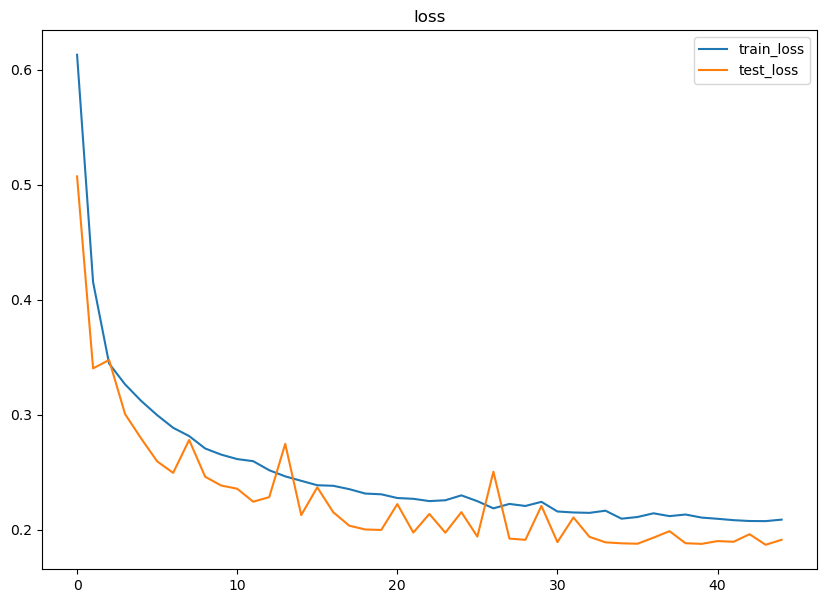

In [52]:
model6_results = train(model=model6, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model6_results, 5)

In [53]:
class yachtModel7(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 64
HIDDEN_UNITS2 = 32
OUT_FEATURES = 1

torch.manual_seed(42) 
model7 = yachtModel7(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.HuberLoss()
optimizer = torch.optim.Adam(params=model7.parameters(),
                             lr=0.00015)

  2%|▏         | 1/50 [00:02<01:49,  2.22s/it]

epoch: 0, train_loss: 38.1084, test_loss: 20.4441


  4%|▍         | 2/50 [00:05<02:09,  2.70s/it]

epoch: 1, train_loss: 3.6511, test_loss: 2.3211


  6%|▌         | 3/50 [00:07<01:51,  2.38s/it]

epoch: 2, train_loss: 1.7025, test_loss: 1.9712


  8%|▊         | 4/50 [00:09<01:43,  2.26s/it]

epoch: 3, train_loss: 1.3988, test_loss: 1.6635


 10%|█         | 5/50 [00:11<01:37,  2.17s/it]

epoch: 4, train_loss: 1.1684, test_loss: 1.4432


 12%|█▏        | 6/50 [00:13<01:32,  2.10s/it]

epoch: 5, train_loss: 0.9777, test_loss: 1.1870


 14%|█▍        | 7/50 [00:15<01:30,  2.11s/it]

epoch: 6, train_loss: 0.8034, test_loss: 0.9289


 16%|█▌        | 8/50 [00:17<01:26,  2.05s/it]

epoch: 7, train_loss: 0.6476, test_loss: 0.6972


 18%|█▊        | 9/50 [00:19<01:24,  2.06s/it]

epoch: 8, train_loss: 0.5145, test_loss: 0.5287


 20%|██        | 10/50 [00:21<01:22,  2.06s/it]

epoch: 9, train_loss: 0.4212, test_loss: 0.4299


 22%|██▏       | 11/50 [00:23<01:21,  2.08s/it]

epoch: 10, train_loss: 0.3757, test_loss: 0.3543


 24%|██▍       | 12/50 [00:25<01:18,  2.06s/it]

epoch: 11, train_loss: 0.3523, test_loss: 0.3239


 26%|██▌       | 13/50 [00:27<01:16,  2.06s/it]

epoch: 12, train_loss: 0.3377, test_loss: 0.3095


 28%|██▊       | 14/50 [00:29<01:14,  2.07s/it]

epoch: 13, train_loss: 0.3288, test_loss: 0.3022


 30%|███       | 15/50 [00:31<01:11,  2.04s/it]

epoch: 14, train_loss: 0.3192, test_loss: 0.3076


 32%|███▏      | 16/50 [00:33<01:09,  2.04s/it]

epoch: 15, train_loss: 0.3119, test_loss: 0.3357


 34%|███▍      | 17/50 [00:35<01:06,  2.02s/it]

epoch: 16, train_loss: 0.3023, test_loss: 0.2820


 36%|███▌      | 18/50 [00:37<01:04,  2.01s/it]

epoch: 17, train_loss: 0.2969, test_loss: 0.2651


 38%|███▊      | 19/50 [00:39<01:01,  1.99s/it]

epoch: 18, train_loss: 0.2901, test_loss: 0.2648


 40%|████      | 20/50 [00:41<01:00,  2.02s/it]

epoch: 19, train_loss: 0.2863, test_loss: 0.2531


 42%|████▏     | 21/50 [00:43<00:58,  2.03s/it]

epoch: 20, train_loss: 0.2793, test_loss: 0.2523


 44%|████▍     | 22/50 [00:45<00:55,  1.98s/it]

epoch: 21, train_loss: 0.2737, test_loss: 0.2440


 46%|████▌     | 23/50 [00:47<00:53,  1.96s/it]

epoch: 22, train_loss: 0.2698, test_loss: 0.2412


 48%|████▊     | 24/50 [00:49<00:51,  1.99s/it]

epoch: 23, train_loss: 0.2721, test_loss: 0.2558


 50%|█████     | 25/50 [00:51<00:50,  2.00s/it]

epoch: 24, train_loss: 0.2683, test_loss: 0.2339


 52%|█████▏    | 26/50 [00:53<00:47,  1.97s/it]

epoch: 25, train_loss: 0.2593, test_loss: 0.2662


 54%|█████▍    | 27/50 [00:55<00:44,  1.94s/it]

epoch: 26, train_loss: 0.2575, test_loss: 0.2519


 56%|█████▌    | 28/50 [00:57<00:42,  1.93s/it]

epoch: 27, train_loss: 0.2556, test_loss: 0.2523


 58%|█████▊    | 29/50 [00:59<00:40,  1.94s/it]

epoch: 28, train_loss: 0.2515, test_loss: 0.2250


 60%|██████    | 30/50 [01:01<00:39,  1.96s/it]

epoch: 29, train_loss: 0.2514, test_loss: 0.2443


 62%|██████▏   | 31/50 [01:03<00:37,  1.98s/it]

epoch: 30, train_loss: 0.2485, test_loss: 0.2236


 64%|██████▍   | 32/50 [01:05<00:35,  1.98s/it]

epoch: 31, train_loss: 0.2492, test_loss: 0.2234


 66%|██████▌   | 33/50 [01:07<00:33,  1.99s/it]

epoch: 32, train_loss: 0.2441, test_loss: 0.2182


 68%|██████▊   | 34/50 [01:09<00:31,  1.95s/it]

epoch: 33, train_loss: 0.2441, test_loss: 0.2167


 70%|███████   | 35/50 [01:11<00:29,  2.00s/it]

epoch: 34, train_loss: 0.2404, test_loss: 0.2277


 72%|███████▏  | 36/50 [01:13<00:28,  2.02s/it]

epoch: 35, train_loss: 0.2385, test_loss: 0.2185


 74%|███████▍  | 37/50 [01:15<00:26,  2.01s/it]

epoch: 36, train_loss: 0.2413, test_loss: 0.2134


 76%|███████▌  | 38/50 [01:17<00:24,  2.01s/it]

epoch: 37, train_loss: 0.2357, test_loss: 0.2123


 78%|███████▊  | 39/50 [01:19<00:21,  1.99s/it]

epoch: 38, train_loss: 0.2337, test_loss: 0.2276


 80%|████████  | 40/50 [01:21<00:19,  1.98s/it]

epoch: 39, train_loss: 0.2350, test_loss: 0.2350


 82%|████████▏ | 41/50 [01:23<00:18,  2.02s/it]

epoch: 40, train_loss: 0.2343, test_loss: 0.2101


 84%|████████▍ | 42/50 [01:25<00:15,  1.99s/it]

epoch: 41, train_loss: 0.2311, test_loss: 0.2122


 86%|████████▌ | 43/50 [01:27<00:14,  2.01s/it]

epoch: 42, train_loss: 0.2309, test_loss: 0.2111


 88%|████████▊ | 44/50 [01:29<00:12,  2.02s/it]

epoch: 43, train_loss: 0.2288, test_loss: 0.2097


 90%|█████████ | 45/50 [01:31<00:10,  2.01s/it]

epoch: 44, train_loss: 0.2307, test_loss: 0.2058


 92%|█████████▏| 46/50 [01:33<00:07,  1.97s/it]

epoch: 45, train_loss: 0.2273, test_loss: 0.2079


 94%|█████████▍| 47/50 [01:35<00:06,  2.04s/it]

epoch: 46, train_loss: 0.2245, test_loss: 0.2099


 96%|█████████▌| 48/50 [01:37<00:04,  2.02s/it]

epoch: 47, train_loss: 0.2254, test_loss: 0.2033


 98%|█████████▊| 49/50 [01:39<00:02,  2.01s/it]

epoch: 48, train_loss: 0.2242, test_loss: 0.2138


100%|██████████| 50/50 [01:41<00:00,  2.03s/it]

epoch: 49, train_loss: 0.2229, test_loss: 0.2028


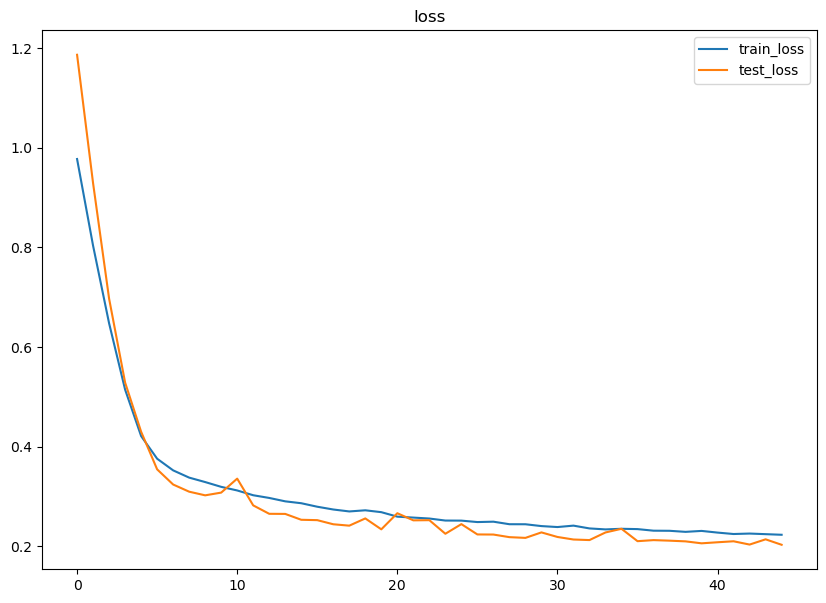

In [54]:
model7_results = train(model=model7, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model7_results, 5)

### results
model6 is the best

In [55]:
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 128
HIDDEN_UNITS2 = 64
OUT_FEATURES = 1

torch.manual_seed(42) 
model = yachtModel6(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.HuberLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.0001)

model_results = train(model=model, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model_results, 5)

  2%|▏         | 1/50 [00:01<01:37,  1.99s/it]

epoch: 0, train_loss: 32.7833, test_loss: 3.1282


  2%|▏         | 1/50 [00:03<03:03,  3.74s/it]


KeyboardInterrupt: 

In [ ]:
from tqdm.auto import tqdm
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device=device):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss = 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred = model(X).squeeze()

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    return test_loss

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device=device):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss = 0 
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X).squeeze()

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    return train_loss

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module, 
          optimizer: torch.optim.Optimizer, 
          epochs: int, 
          device: torch.device = device):
    results = {"train_loss": [], 
               "test_loss": []}
    
    for epoch in range(epochs):
        train_loss = train_step(model=model, 
                                dataloader=train_dataloader, 
                                loss_fn=loss_fn, 
                                optimizer=optimizer,
                                device=device)
        test_loss = test_step(model=model, 
                              dataloader=test_dataloader, 
                              loss_fn=loss_fn,
                              device=device)
        
        # print(f"epoch: {epoch}, train_loss: {train_loss:.4f}, test_loss: {test_loss:.4f}")
        results['train_loss'].append(train_loss)
        results['test_loss'].append(test_loss)
    
    return results

In [ ]:
def train_models( X_train: pd.DataFrame, 
                  y_train: pd.DataFrame,
                  X_test: pd.DataFrame, 
                  y_test: pd.DataFrame,
                  device: torch.device = device):
  
    models = {}
    final_results = {"train_loss": [], 
               "test_loss": []}
    
    if not os.path.exists('models'):
        os.makedirs('models', exist_ok=True)
     
    for column in tqdm(y_train.columns.to_list()):
        # making datasets 
        train_dataset = MyDataset(X_train, y_train[column])
        test_dataset = MyDataset(X_test, y_test[column]) 

        # making dataloader
        train_dataloader = DataLoader(dataset=train_dataset, 
                                        batch_size=32,
                                        shuffle=True, 
                                        num_workers=os.cpu_count())
        test_dataloader = DataLoader(dataset=test_dataset, 
                                    batch_size=32, 
                                    shuffle=False, 
                                    num_workers=os.cpu_count())
        
        # making model
        IN_FEATURES = len(indf.columns)
        HIDDEN_UNITS1 = 128
        HIDDEN_UNITS2 = 64
        OUT_FEATURES = 1

        torch.manual_seed(42) 
        models[column] = yachtModel6(input_shape=IN_FEATURES, 
                        hidden_units1=HIDDEN_UNITS1,
                        hidden_units2=HIDDEN_UNITS2,
                        output_shape=OUT_FEATURES).to(device)

        loss_fun = nn.HuberLoss()
        optimizer = torch.optim.Adam(params=models[column].parameters(),
                                    lr=0.0001)

        model_results = train(model=models[column], 
                                train_dataloader=train_dataloader, 
                                test_dataloader=test_dataloader, 
                                loss_fn=loss_fun, 
                                optimizer=optimizer, 
                                epochs=EPOCHS, 
                                device=device)
        final_results["train_loss"].append(model_results["train_loss"][-1])
        final_results["test_loss"].append(model_results["test_loss"][-1])
        
        # saving model
        torch.save(models[column].state_dict(), "models/" + str(column))
    
    return final_results

final_results = train_models(X_train=X_train,
                             y_train=y_train,
                             X_test=X_test, 
                             y_test=y_test,
                             device=device)
      
    

  0%|          | 0/96 [00:06<?, ?it/s]


KeyboardInterrupt: 

{'train_loss': [0.21377085128663734, 0.2387742920678792, 0.2547902051346525, 0.3342327076980399, 0.41784169986380015, 0.49190813674233774, 0.6641346549286562, 0.97396822309824, 0.011800959767535278, 0.012237605003955867, 0.012924017412040164, 0.014949936685587398, 0.016897683798828545, 0.019506099891678067, 0.0317702452429799, 0.04443796769841526, 0.024112555158089292, 0.021208747283629686, 0.018552819131567404, 0.018622953025785285, 0.02013825598595, 0.023151574994737096, 0.04460553407578836, 0.068650345253568, 0.025382486404045435, 0.020984433578475535, 0.01781222696664218, 0.0190491948105962, 0.021567729691681563, 0.02562138945457226, 0.034768545624693684, 0.044107416625357006, 0.026909825956017087, 0.0212822955127509, 0.019787666299235347, 0.023939730457729534, 0.02824812754827542, 0.03401160446578914, 0.046924015964706876, 0.05895793720254849, 0.024374288390793395, 0.019506749416666046, 0.02015631235362543, 0.029023623920551737, 0.03908993648751848, 0.048522686761414, 0.0677942933

<BarContainer object of 96 artists>

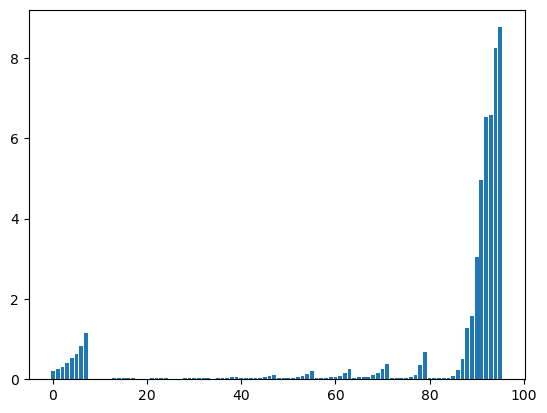

In [ ]:
print(final_results)
plt.bar(range(len(final_results['test_loss'])), final_results['test_loss']) # predictions for last 8 looks bad, let

In [ ]:
pd.concat([outdf[outdf.columns.to_list()[-8:]].min(), 
              outdf[outdf.columns.to_list()[-8:]].max()],
          axis=1)

,0,1
Gybe Angles 6 kt,129.500000,180.0
Gybe Angles 8 kt,138.800003,180.0
Gybe Angles 10 kt,139.600006,180.0
Gybe Angles 12 kt,136.000000,180.0
Gybe Angles 14 kt,133.199997,180.0
Gybe Angles 16 kt,134.699997,180.0
Gybe Angles 20 kt,132.399994,180.0
Gybe Angles 24 kt,132.699997,180.0


In [ ]:

def train2(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module, 
          optimizer: torch.optim.Optimizer, 
          epochs: int, 
          lr_start: int,
          lr_end: int,
          device: torch.device = device):
    
    def lr_lambda(epoch):
        return (lr_end / lr_start) ** (epoch / EPOCHS)
    
    results = {"train_loss": [], 
               "test_loss": []}
    
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)
    
    for epoch in range(epochs):
        train_loss = train_step(model=model, 
                                dataloader=train_dataloader, 
                                loss_fn=loss_fn, 
                                optimizer=optimizer,
                                device=device)
        test_loss = test_step(model=model, 
                              dataloader=test_dataloader, 
                              loss_fn=loss_fn,
                              device=device)
        scheduler.step()
        
        print(f"epoch: {epoch}, train_loss: {train_loss:.4f}, test_loss: {test_loss:.4f}")
        results['train_loss'].append(train_loss)
        results['test_loss'].append(test_loss)
    return results

In [ ]:
class yachtModel8(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units1, out_features=hidden_units2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units1, out_features=output_shape), 
            nn.ReLU(),
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
def train_models2( X_train: pd.DataFrame, 
                  y_train: pd.DataFrame,
                  X_test: pd.DataFrame, 
                  y_test: pd.DataFrame,
                  device: torch.device = device):
  
    models = {}
    final_results2 = {"train_loss": [], 
               "test_loss": []}
     
    for column in [y_train.columns.to_list()[-1]]:
        # making datasets 
        train_dataset = MyDataset(X_train, y_train[column])
        test_dataset = MyDataset(X_test, y_test[column]) 

        # making dataloader
        train_dataloader = DataLoader(dataset=train_dataset, 
                                        batch_size=32,
                                        shuffle=True, 
                                        num_workers=os.cpu_count())
        test_dataloader = DataLoader(dataset=test_dataset, 
                                    batch_size=32, 
                                    shuffle=False, 
                                    num_workers=os.cpu_count())
        
        # making model
        IN_FEATURES = len(indf.columns)
        HIDDEN_UNITS1 = 128
        HIDDEN_UNITS2 = 64
        OUT_FEATURES = 1
        EPOCHS=5
        start_lr = 0.001
        end_lr = 0.0001
        

        torch.manual_seed(42) 
        models[column] = yachtModel8(input_shape=IN_FEATURES, # this is with relu
                        hidden_units1=HIDDEN_UNITS1,
                        hidden_units2=HIDDEN_UNITS2,
                        output_shape=OUT_FEATURES).to(device)

        loss_fun = nn.HuberLoss()
        optimizer = torch.optim.Adam(params=models[column].parameters(),
                                    lr=start_lr)

        model_results = train2(model=models[column], 
                                train_dataloader=train_dataloader, 
                                test_dataloader=test_dataloader, 
                                loss_fn=loss_fun, 
                                optimizer=optimizer, 
                                epochs=EPOCHS,
                                lr_start=start_lr,
                                lr_end=end_lr, 
                                device=device)
        final_results2["train_loss"].append(model_results["train_loss"][-1])
        final_results2["test_loss"].append(model_results["test_loss"][-1])
        
        # saving model
        torch.save(models[column].state_dict(), "models/" + str(column))
    
    return final_results2

final_results2 = train_models2(X_train=X_train,
                             y_train=y_train,
                             X_test=X_test, 
                             y_test=y_test,
                             device=device)

epoch: 0, train_loss: 41.3045, test_loss: 10.2907
epoch: 1, train_loss: 8.5223, test_loss: 8.8348
epoch: 2, train_loss: 7.7021, test_loss: 7.8635
epoch: 3, train_loss: 6.8762, test_loss: 7.1116
epoch: 4, train_loss: 6.4266, test_loss: 7.3801


cel above I found best nn setings for last elemnet, now i will apply it to last row (last 8 elements) i have to predict
protips for future: when you serach for best setting it's good to make extra one cell with best setting for later to not loss it 

In [ ]:
class yachtModel8(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units1, out_features=hidden_units2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units1, out_features=output_shape), 
            nn.ReLU(),
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
def train_models2( X_train: pd.DataFrame, 
                  y_train: pd.DataFrame,
                  X_test: pd.DataFrame, 
                  y_test: pd.DataFrame,
                  device: torch.device = device):
  
    models = {}
    final_results2 = {"train_loss": [], 
               "test_loss": []}
     
    for column in y_train.columns.to_list()[-8:]:
        # making datasets 
        train_dataset = MyDataset(X_train, y_train[column])
        test_dataset = MyDataset(X_test, y_test[column]) 

        # making dataloader
        train_dataloader = DataLoader(dataset=train_dataset, 
                                        batch_size=32,
                                        shuffle=True, 
                                        num_workers=os.cpu_count())
        test_dataloader = DataLoader(dataset=test_dataset, 
                                    batch_size=32, 
                                    shuffle=False, 
                                    num_workers=os.cpu_count())
        
        # making model
        IN_FEATURES = len(indf.columns)
        HIDDEN_UNITS1 = 128
        HIDDEN_UNITS2 = 64
        OUT_FEATURES = 1
        EPOCHS=150
        start_lr = 0.001
        end_lr = 0.0001
        

        torch.manual_seed(42) 
        models[column] = yachtModel8(input_shape=IN_FEATURES, # this is with relu
                        hidden_units1=HIDDEN_UNITS1,
                        hidden_units2=HIDDEN_UNITS2,
                        output_shape=OUT_FEATURES).to(device)

        loss_fun = nn.HuberLoss()
        optimizer = torch.optim.Adam(params=models[column].parameters(),
                                    lr=start_lr)

        model_results = train2(model=models[column], 
                                train_dataloader=train_dataloader, 
                                test_dataloader=test_dataloader, 
                                loss_fn=loss_fun, 
                                optimizer=optimizer, 
                                epochs=EPOCHS,
                                lr_start=start_lr,
                                lr_end=end_lr, 
                                device=device)
        final_results2["train_loss"].append(model_results["train_loss"][-1])
        final_results2["test_loss"].append(model_results["test_loss"][-1])
        
        # saving model
        torch.save(models[column].state_dict(), "models/" + str(column))
    
    return final_results2

final_results2 = train_models2(X_train=X_train,
                             y_train=y_train,
                             X_test=X_test, 
                             y_test=y_test,
                             device=device)

epoch: 0, train_loss: 32.8416, test_loss: 3.7706
epoch: 1, train_loss: 1.7445, test_loss: 1.3685
epoch: 2, train_loss: 1.2386, test_loss: 1.5736
epoch: 3, train_loss: 1.0960, test_loss: 1.1484
epoch: 4, train_loss: 1.0936, test_loss: 1.3665
epoch: 5, train_loss: 1.0412, test_loss: 0.9889
epoch: 6, train_loss: 1.0178, test_loss: 0.9759
epoch: 7, train_loss: 0.9452, test_loss: 1.2907
epoch: 8, train_loss: 0.9321, test_loss: 1.2304
epoch: 9, train_loss: 0.9552, test_loss: 1.1320
epoch: 10, train_loss: 0.8586, test_loss: 0.9823
epoch: 11, train_loss: 0.8621, test_loss: 0.8832
epoch: 12, train_loss: 0.8707, test_loss: 0.8800
epoch: 13, train_loss: 0.8462, test_loss: 0.8482
epoch: 14, train_loss: 0.8395, test_loss: 0.9533
epoch: 15, train_loss: 0.8036, test_loss: 0.8067
epoch: 16, train_loss: 0.8225, test_loss: 1.2830
epoch: 17, train_loss: 0.7756, test_loss: 0.9441
epoch: 18, train_loss: 0.7722, test_loss: 0.7694
epoch: 19, train_loss: 0.7601, test_loss: 0.7558
epoch: 20, train_loss: 0.7604

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ef5690ea950>
Traceback (most recent call last):
  File "/home/kuba/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/home/kuba/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/home/kuba/miniconda3/envs/pytorch/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    
assert self._parent_pid == os.getpid(), 'can only test a child process'AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ef5690ea950>
Traceback (most recent call last):
  File "/home/kuba/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()Exception ignored in: 
<function _MultiProcessingD

epoch: 126, train_loss: 0.6380, test_loss: 0.6276
epoch: 127, train_loss: 0.6395, test_loss: 0.6302
epoch: 128, train_loss: 0.6378, test_loss: 0.6283
epoch: 129, train_loss: 0.6383, test_loss: 0.6292
epoch: 130, train_loss: 0.6394, test_loss: 0.6288
epoch: 131, train_loss: 0.6397, test_loss: 0.6259
epoch: 132, train_loss: 0.6377, test_loss: 0.6412
epoch: 133, train_loss: 0.6378, test_loss: 0.6278
epoch: 134, train_loss: 0.6385, test_loss: 0.6323
epoch: 135, train_loss: 0.6375, test_loss: 0.6313
epoch: 136, train_loss: 0.6385, test_loss: 0.6301
epoch: 137, train_loss: 0.6379, test_loss: 0.6290
epoch: 138, train_loss: 0.6376, test_loss: 0.6354
epoch: 139, train_loss: 0.6387, test_loss: 0.6325
epoch: 140, train_loss: 0.6377, test_loss: 0.6354
epoch: 141, train_loss: 0.6380, test_loss: 0.6322
epoch: 142, train_loss: 0.6428, test_loss: 0.6306
epoch: 143, train_loss: 0.6377, test_loss: 0.6300
epoch: 144, train_loss: 0.6388, test_loss: 0.6308
epoch: 145, train_loss: 0.6382, test_loss: 0.6283


{'train_loss': [0.637565661930708, 0.8637025017536223, 1.121680630944592, 0.9420726663307335, 1.8969165800351997, 1.8721429596310255, 2.036621178310223, 3.475432942895328], 'test_loss': [0.6292900626790033, 0.8038282231108783, 1.4680226371712881, 1.1668217521007747, 1.930725193186982, 2.655328472999677, 3.272263767784589, 3.5069526858525735]}


<BarContainer object of 8 artists>

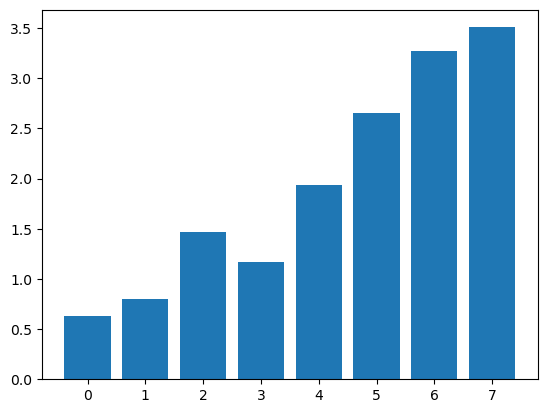

In [ ]:
print(final_results2)
plt.bar(range(len(final_results2['test_loss'])), final_results2['test_loss']) # predictions for last 8 

In [ ]:
len(indf.columns)

25